## Unsupervised Learning
#### by **Ivan Alducin**
<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [4]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Importa el archivo "Online Retail.csv"
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')

In [8]:
# Análisis Exploratorio
data = pd.read_csv('M30 Online Retail.csv', encoding='latin-1')
print(data.head())

# Resumen estadístico
print(data.describe())

# Valores nulos
print(data.isnull().sum())

  INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
0  01/12/2019 08:26        2.55      17850.0  United Kingdom  
1  01/12/2019 08:26        3.39      17850.0  United Kingdom  
2  01/12/2019 08:26        2.75      17850.0  United Kingdom  
3  01/12/2019 08:26        3.39      17850.0  United Kingdom  
4  01/12/2019 08:26        3.39      17850.0  United Kingdom  
            QUANTITY     UNIT_PRICE    CUSTOMER_ID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158    

In [12]:
# Eliminar todos los valores nulos
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    406829 non-null  object 
 1   STOCK_CODE    406829 non-null  object 
 2   DESCRIPTION   406829 non-null  object 
 3   QUANTITY      406829 non-null  int64  
 4   INVOICE_DATE  406829 non-null  object 
 5   UNIT_PRICE    406829 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [16]:
# Delimitacion de valores positivos de 'Quantity' (deseams analizar lo realmente comprado)
datos_reales = data[data['QUANTITY'] > 0]
datos_reales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    397924 non-null  object 
 1   STOCK_CODE    397924 non-null  object 
 2   DESCRIPTION   397924 non-null  object 
 3   QUANTITY      397924 non-null  int64  
 4   INVOICE_DATE  397924 non-null  object 
 5   UNIT_PRICE    397924 non-null  float64
 6   CUSTOMER_ID   397924 non-null  float64
 7   REGION        397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [78]:
# Obtener los clientes unicos
customer = pd.DataFrame(datos_reales[['CUSTOMER_ID']].drop_duplicates())
print(customer)

        CUSTOMER_ID
0           17850.0
9           13047.0
26          12583.0
46          13748.0
65          15100.0
...             ...
536969      13436.0
537255      15520.0
538064      13298.0
538812      14569.0
541768      12713.0

[4339 rows x 1 columns]


In [50]:
# Obtener la última fecha de compra por cliente
max_purchase = datos_reales[['INVOICE_DATE', 'CUSTOMER_ID']]
max_purchase['INVOICE_DATE'] = pd.to_datetime(max_purchase['INVOICE_DATE'], format='mixed', dayfirst=True)
max_purchase = max_purchase.sort_values(['CUSTOMER_ID', 'INVOICE_DATE'], ascending=[True, False])
max_purchase = max_purchase.drop_duplicates(subset='CUSTOMER_ID', keep='first')
max_purchase

,INVOICE_DATE,CUSTOMER_ID
61619,2020-01-18 10:01:00,12346.0
535004,2020-12-07 15:52:00,12347.0
359058,2020-09-25 13:13:00,12348.0
485502,2020-11-21 09:51:00,12349.0
80323,2020-02-02 16:01:00,12350.0
...,...,...
111045,2020-03-07 09:52:00,18280.0
222954,2020-06-12 10:53:00,18281.0
519825,2020-12-02 11:43:00,18282.0
530454,2020-12-06 12:02:00,18283.0


In [56]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón
df = datos_reales.merge(max_purchase, on = 'CUSTOMER_ID', how = 'left')
df['INVOICE_DATE_x'] = pd.to_datetime(df['INVOICE_DATE_x'], format='mixed', dayfirst=True)
#df['INVOICE_DATE_y'] = pd.to_datetime(df['INVOICE_DATE_y'], format='mixed', dayfirst=True)
df['RECENCY'] = (df['INVOICE_DATE_y'] - df['INVOICE_DATE_x']).dt.days
df

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE_x,UNIT_PRICE,CUSTOMER_ID,REGION,INVOICE_DATE_y,RECENCY
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom,2019-12-02 15:27:00,1
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-02 15:27:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom,2019-12-02 15:27:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-02 15:27:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-02 15:27:00,1
...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2020-12-09 12:50:00,0.85,12680.0,France,2020-12-09 12:50:00,0
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2020-12-09 12:50:00,2.10,12680.0,France,2020-12-09 12:50:00,0
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2020-12-09 12:50:00,4.15,12680.0,France,2020-12-09 12:50:00,0
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2020-12-09 12:50:00,4.15,12680.0,France,2020-12-09 12:50:00,0


In [120]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
recency = df[['CUSTOMER_ID', 'RECENCY']]
customer = max_purchase.merge(recency, on = 'CUSTOMER_ID', how = 'left')

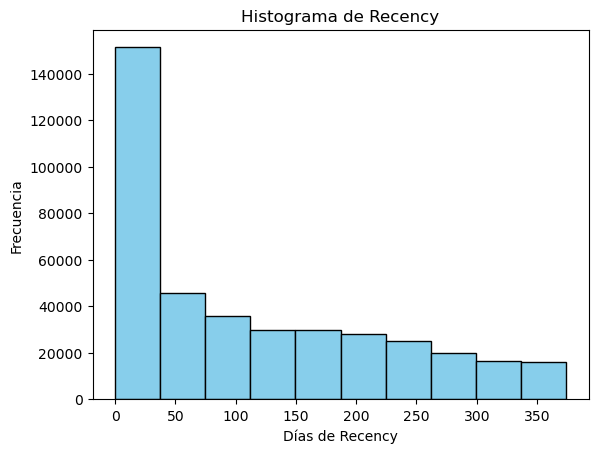

In [58]:
# Grafica un histograma de Recency
plt.hist(df['RECENCY'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Recency')
plt.xlabel('Días de Recency')
plt.ylabel('Frecuencia')
plt.show()

In [60]:
# Imprime la Estadística de Resumen para Recency
# Resumen estadístico
print(df.describe())

            QUANTITY                 INVOICE_DATE_x     UNIT_PRICE  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2020-07-10 19:39:59.930338560       3.116174   
min         1.000000            2019-12-01 08:26:00       0.000000   
25%         2.000000            2020-04-07 11:12:00       1.250000   
50%         6.000000            2020-07-31 14:39:00       1.950000   
75%        12.000000            2020-10-20 14:33:00       3.750000   
max     80995.000000            2020-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

         CUSTOMER_ID                 INVOICE_DATE_y        RECENCY  
count  397924.000000                         397924  397924.000000  
mean    15294.315171  2020-10-29 21:27:49.261718784     110.689076  
min     12346.000000            2019-12-01 09:53:00       0.000000  
25%     13969.000000            2020-10-27 14:20:00       0.000000  
50%     15159.000000    

## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [62]:
# Obtener el número de compras por cliente
frequency = datos_reales.groupby('CUSTOMER_ID').size().reset_index(name='FREQUENCY')
frequency

,CUSTOMER_ID,FREQUENCY
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [122]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer2 = customer.merge(frequency, on = 'CUSTOMER_ID', how = 'left')
customer2 = customer2.sort_values(['FREQUENCY'], ascending=[True])
customer2

,INVOICE_DATE,CUSTOMER_ID,RECENCY,FREQUENCY
0,2020-01-18 10:01:00,12346.0,0,1
293182,2020-10-24 12:02:00,16742.0,0,1
163101,2020-05-25 12:39:00,14705.0,0,1
65735,2019-12-08 14:53:00,13270.0,0,1
386460,2020-11-23 13:57:00,18084.0,0,1
...,...,...,...,...
369211,2020-12-08 12:07:00,17841.0,163,7847
369210,2020-12-08 12:07:00,17841.0,163,7847
369209,2020-12-08 12:07:00,17841.0,163,7847
369207,2020-12-08 12:07:00,17841.0,163,7847


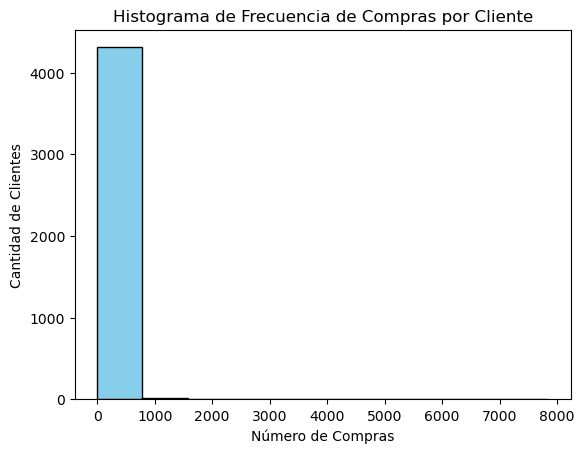

In [94]:
# Grafica un histograma de Frequency
plt.hist(frequency['FREQUENCY'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Frecuencia de Compras por Cliente')
plt.xlabel('Número de Compras')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [98]:
# Imprime la Estadística de Resumen para Frequency
print(customer2['FREQUENCY'].describe())

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: FREQUENCY, dtype: float64


## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [114]:
# Calcular el monto total por cada compra
df['MONETARY'] = df['QUANTITY'] * df['UNIT_PRICE']

# Obtener el valor monetario de compra por cliente
monetary = df.groupby('CUSTOMER_ID')['MONETARY'].sum().reset_index(name='MONETARY_TOTAL')
monetary = monetary.sort_values(['MONETARY_TOTAL'], ascending=[True])
monetary

,CUSTOMER_ID,MONETARY_TOTAL
685,13256.0,0.00
3218,16738.0,3.75
1794,14792.0,6.20
3015,16454.0,6.90
4099,17956.0,12.75
...,...,...
1880,14911.0,143825.06
3009,16446.0,168472.50
3729,17450.0,194550.79
4202,18102.0,259657.30


In [124]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer3 = customer2.merge(monetary, on = 'CUSTOMER_ID', how = 'left')
customer3

,INVOICE_DATE,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY_TOTAL
0,2020-01-18 10:01:00,12346.0,0,1,77183.60
1,2020-10-24 12:02:00,16742.0,0,1,464.90
2,2020-05-25 12:39:00,14705.0,0,1,179.00
3,2019-12-08 14:53:00,13270.0,0,1,590.00
4,2020-11-23 13:57:00,18084.0,0,1,90.48
...,...,...,...,...,...
397919,2020-12-08 12:07:00,17841.0,163,7847,40991.57
397920,2020-12-08 12:07:00,17841.0,163,7847,40991.57
397921,2020-12-08 12:07:00,17841.0,163,7847,40991.57
397922,2020-12-08 12:07:00,17841.0,163,7847,40991.57


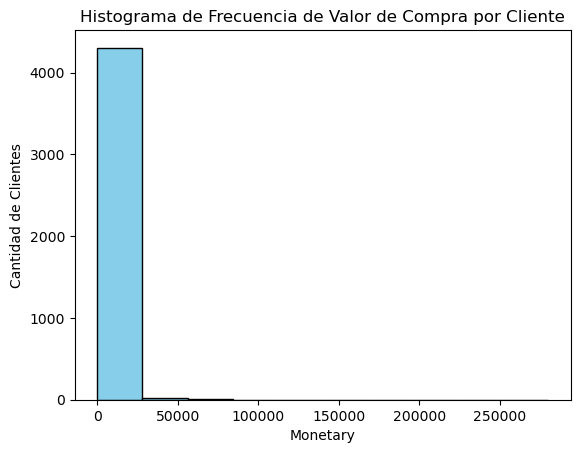

In [106]:
# Grafica un histograma de Monetary
plt.hist(monetary['MONETARY_TOTAL'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Frecuencia de Valor de Compra por Cliente')
plt.xlabel('Monetary')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [110]:
# Imprime la Estadística de Resumen para Monetary
print(customer3['MONETARY_TOTAL'].describe())

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: MONETARY_TOTAL, dtype: float64


## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [130]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [118]:
# Importa la librería de kMeans
from sklearn.cluster import KMeans

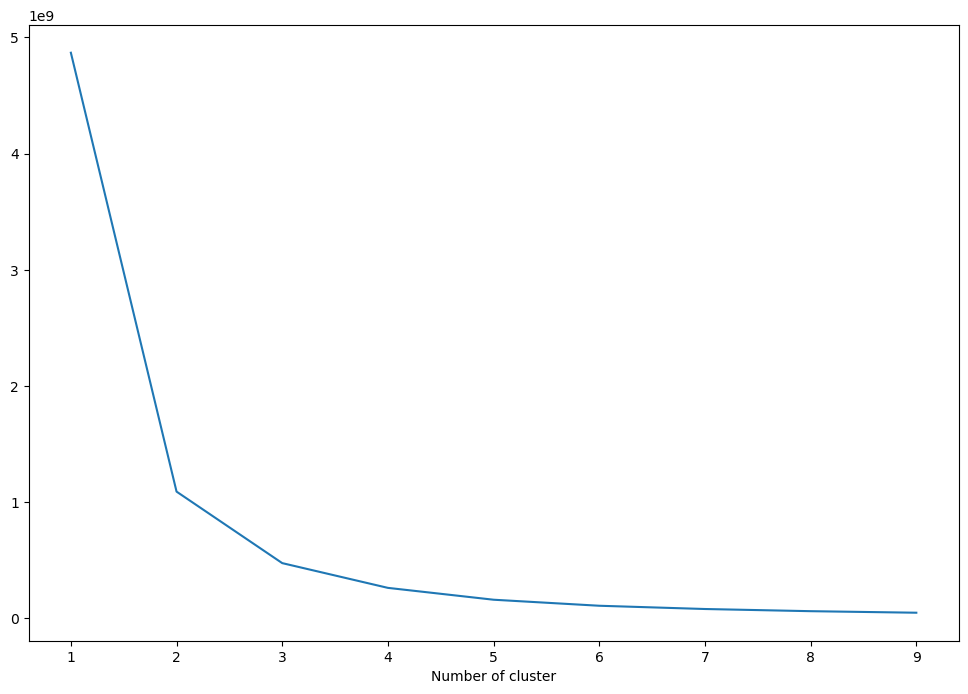

In [142]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
sse={}
recency = customer3[['RECENCY']].copy()

for k in range(1, 10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Entrena el algoritmo
    kmeans.fit(recency)
    
    # Adjunta las etiquetas
    recency["clusters"] = kmeans.labels_
    
    # Adunta la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_
    
# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [144]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

# Entrenar el algoritmo
kmeans.fit(customer3[['RECENCY']])

# Obtener las predicciones
customer3['RECENCY_CLUSTER'] = kmeans.predict(customer3[['RECENCY']])

# Ordenar los clusters
customer3 = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer3, False)

# Estadística Descriptiva del cluster creado
customer3.groupby('RECENCY_CLUSTER')['RECENCY'].mean()

RECENCY_CLUSTER
0    311.187300
1    200.704129
2     98.258574
3     11.829231
Name: RECENCY, dtype: float64

In [148]:
# Instanciar el algoritmo con 4 clusters para Frequency 
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

# Entrenar el algoritmo
kmeans.fit(customer3[['FREQUENCY']])

# Obtener las predicciones
customer3['FREQUENCY_CLUSTER'] = kmeans.predict(customer3[['FREQUENCY']])

# Ordenar los clusters
customer3 = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer3, True)

# Estadística Descriptiva de los clusters
customer3.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].mean()

FREQUENCY_CLUSTER
0     219.80549
1    1518.82922
2    5166.00793
3    7847.00000
Name: FREQUENCY, dtype: float64

In [150]:
# Instanciar el algoritmo con 4 clusters para Monetary 
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

# Entrenar el algoritmo
kmeans.fit(customer3[['MONETARY_TOTAL']])

# Obtener las predicciones
customer3['MONETARY_CLUSTER'] = kmeans.predict(customer3[['MONETARY_TOTAL']])

# Ordenar los clusters ¿Como tienes que ordenar el cluster?
customer3 = order_cluster('MONETARY_CLUSTER', 'MONETARY_TOTAL', customer3, True)

# Estadística Descriptiva de los clusters
customer3.groupby('MONETARY_CLUSTER')['MONETARY_TOTAL'].mean()

MONETARY_CLUSTER
0      3529.948620
1     48839.130439
2    139718.945633
3    276678.939825
Name: MONETARY_TOTAL, dtype: float64

## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [172]:
# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer3['SCORE'] = customer3['RECENCY_CLUSTER'] + customer3['FREQUENCY_CLUSTER'] + customer3['MONETARY_CLUSTER']

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
customer3.groupby('SCORE')[['RECENCY', 'FREQUENCY', 'MONETARY_TOTAL']].mean()

#customer3['SCORE'] = pd.to_numeric(customer3['SCORE'], errors='coerce')

,RECENCY,FREQUENCY,MONETARY_TOTAL
SCORE,,,
0,310.733165,285.051394,4640.516711
1,209.427671,333.970393,5115.920180
2,113.918029,362.750493,6809.823931
3,19.653690,258.431636,4239.812395
4,111.703892,2363.658688,54567.132969
5,123.012898,4547.024349,90587.027819
6,56.316749,5472.763896,81386.468819
7,24.560918,6432.498377,104365.363391


In [174]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):
    if score <= 1:
        return 'Low-Value'
    elif score > 1 and score <= 4:
        return 'Average'
    elif score > 4 and score <= 6:
        return 'Potential'
    else:
        return 'High-Value'

# Crear una columna aplicando esta función al campo 'SCORE'
customer3['SEGMENT'] = customer3['SCORE'].apply(segment)

In [176]:
# Vamos a dar un vistazo a la tabla final
customer3.head()

,INVOICE_DATE,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY_TOTAL,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
0,2020-01-18 10:01:00,12346.0,0,1,77183.60,3,0,1,4,Average
1,2020-10-24 12:02:00,16742.0,0,1,464.90,3,0,0,3,Average
2,2020-05-25 12:39:00,14705.0,0,1,179.00,3,0,0,3,Average
3,2019-12-08 14:53:00,13270.0,0,1,590.00,3,0,0,3,Average
4,2020-11-23 13:57:00,18084.0,0,1,90.48,3,0,0,3,Average


In [178]:
# Imprime la proporción o el total de clientes por segmento
print(customer3['SEGMENT'].value_counts())

SEGMENT
Average       259038
Low-Value     114995
Potential      19270
High-Value      4621
Name: count, dtype: int64


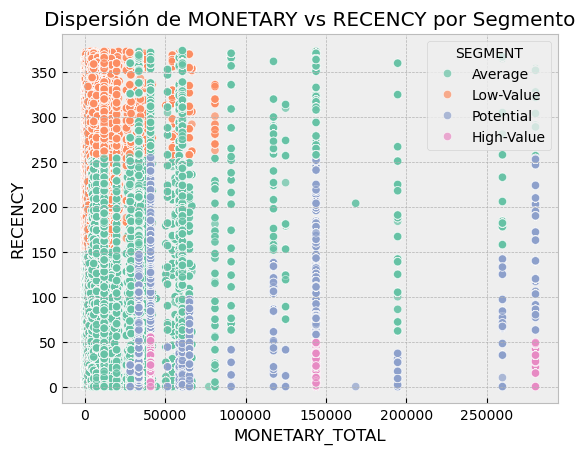

In [188]:
# Define un estilo 'bmh'
plt.style.use('bmh')

# Filtra los valores para RECENCY < 4000
custom_filter = customer3[customer3['RECENCY'] < 4000]

# Crea un grafico de dispersion de 'MONETARY' VS 'RECENCY' por Segmento
sb.scatterplot(
    data = custom_filter,
    x = 'MONETARY_TOTAL',
    y = 'RECENCY',
    hue = 'SEGMENT',
    palette = 'Set2',
    alpha = 0.7
)

plt.title('Dispersión de MONETARY vs RECENCY por Segmento')
plt.show()

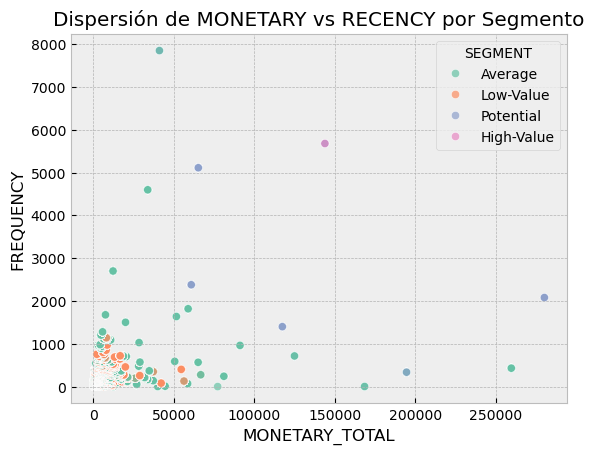

In [186]:
# Crea un grafico de dispersion de 'MONETARY' vs 'FREQUENCY' vs  por Segmento
sb.scatterplot(
    data = custom_filter,
    x = 'MONETARY_TOTAL',
    y = 'FREQUENCY',
    hue = 'SEGMENT',
    palette = 'Set2',
    alpha = 0.7
)

plt.title('Dispersión de MONETARY vs FREQUENCY por Segmento')
plt.show()

# CONCLUSION FINAL
A partir de este analisis podemos entender mejor al consumidor, catalogandolo de tal forma que nos ayude a identificar potenciales o de alto valor.
Con las ultimas dispersiones podemos hacer generar una conclusion de como se relaciona la frecuncia con el gasto total o gasto total con cuanto tiempo ha pasado desde la ultima compra.

Este tipo de analisis nos pueden ayudar a la toma de decisiones a la hora de segmentar a nuestros clientes, y para ver en cuales podemos por ejemplo, generar un poco mas de gasto para su retencion.